In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# POSITIONING ANALYSIS FOR CSGO ON MIRAGE MAP

data = pd.read_csv('./CSGO_DATA/mm_master_demos.csv')
analyzed_map = 'de_mirage'

data = data[(data.map == analyzed_map) & ((data.round_type == 'PISTOL_ROUND') | (data.round_type == 'NORMAL'))]

In [3]:
# MAPPING X AND Y COORDINATES FROM THE DATAASET TO MATCH IMAGE RESOLUTION
# MAPPING THIS COORDINATES HELPS TO DRAW POINTS ON MAP IMAGE

def mapX(xinput,startX=-3217,endX=1912,resX=1024):
    sizeX=endX-startX
    if startX < 0:
        xinput += startX *(-1.0)
    else:
        xinput += startX
    xoutput = float((xinput / abs(sizeX)) * resX);
    return xoutput

def mapY(yinput,startY=-3401,endY=1682,resY=1024):
    sizeY=endY-startY
    if startY < 0:
        yinput += startY *(-1.0)
    else:
        yinput += startY
    youtput = float((yinput / abs(sizeY)) * resY);
    return resY-youtput


data['attacker_mapX'] = data['att_pos_x'].apply(mapX)
data['attacker_mapY'] = data['att_pos_y'].apply(mapY)

In [4]:
data.head()

,Unnamed: 0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,...,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank,attacker_mapX,attacker_mapY
4269,0,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7392,115.9530,Team 1,Team 2,CounterTerrorist,...,-359.5016,389.7257,-468.7209,529.1569,PISTOL_ROUND,4250,4200,15.0,570.496853,260.336196
4270,1,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7394,115.9842,Team 2,Team 1,Terrorist,...,-650.1707,520.0313,-352.4009,392.1384,PISTOL_ROUND,4250,4200,15.0,512.465043,234.085373
4271,2,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,7404,116.1405,Team 2,Team 1,Terrorist,...,-650.1707,520.0313,-335.1208,401.2988,PISTOL_ROUND,4250,4200,15.0,512.465043,234.085373
4272,3,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8154,127.8608,Team 1,Team 2,CounterTerrorist,...,-2064.0290,793.1069,-1575.5010,685.9157,PISTOL_ROUND,4250,4200,15.0,230.189570,179.072700
4273,4,003218553373129179487_1555113029.dem,de_mirage,09/28/2017 8:44:36 PM,1,8162,127.9858,Team 2,Team 1,Terrorist,...,-1090.8520,677.1235,-2063.8480,793.9529,PISTOL_ROUND,4250,4200,15.0,424.483438,202.438233


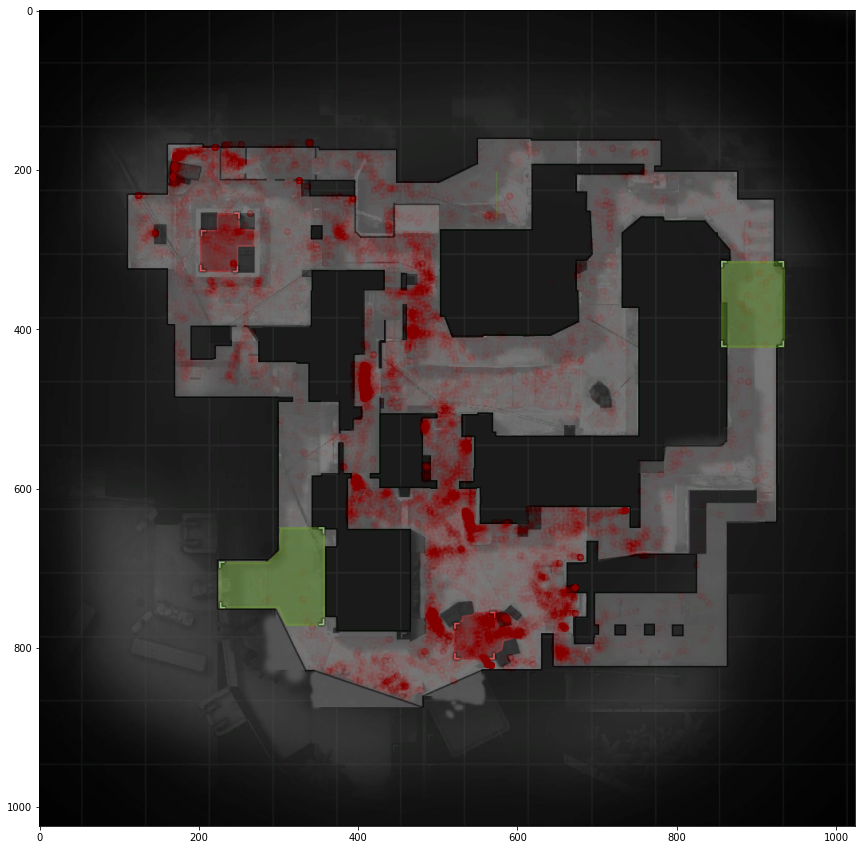

In [5]:
# CT ANALYSIS
# FOR ANY WEPON
ct_data = data[(data.is_bomb_planted == False) & (data.att_side == 'CounterTerrorist') & (data.winner_side == 'CounterTerrorist')]

im = plt.imread("./CSGO_DATA/de_mirage.png")
plt.figure(figsize=(15,15))
t = plt.imshow(im)
t = plt.scatter(ct_data['attacker_mapX'], ct_data['attacker_mapY'],alpha=0.008,c='red')

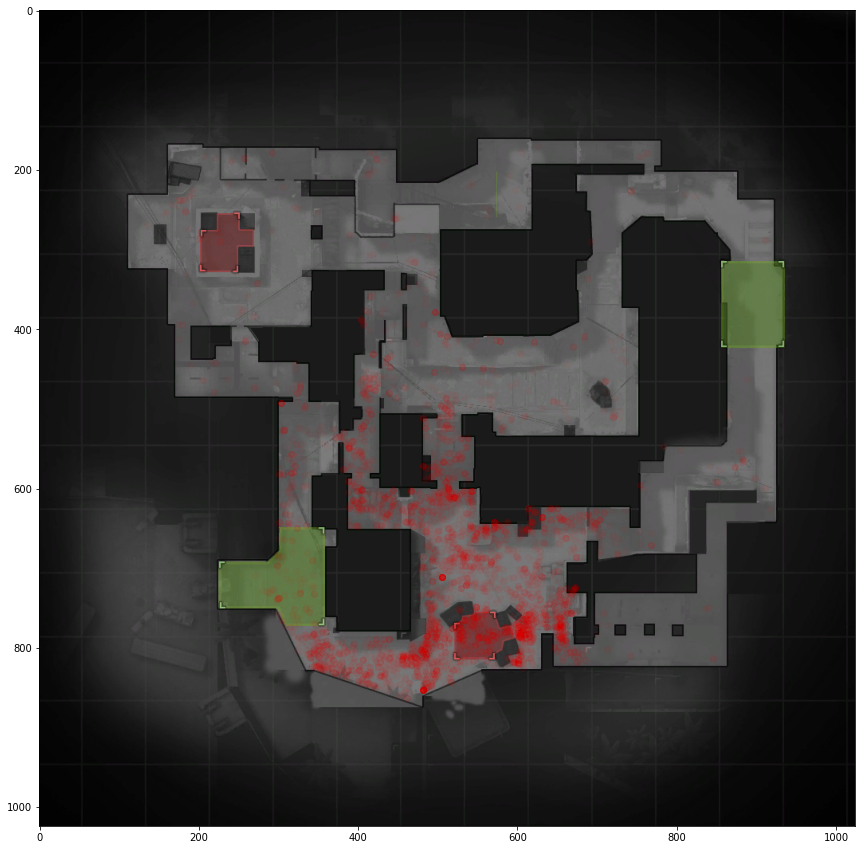

In [6]:
# BOMB SITE A
# TERRORIST POSITION WHEN THEY WON

t_data_siteA = data[(data.is_bomb_planted == True) & (data.att_side == 'Terrorist') & (data.bomb_site == 'A') & (data.winner_side == 'Terrorist')]

im = plt.imread("./CSGO_DATA/de_mirage.png")
plt.figure(figsize=(15,15))
t = plt.imshow(im)
t = plt.scatter(t_data_siteA['attacker_mapX'], t_data_siteA['attacker_mapY'],alpha=0.03,c='red')

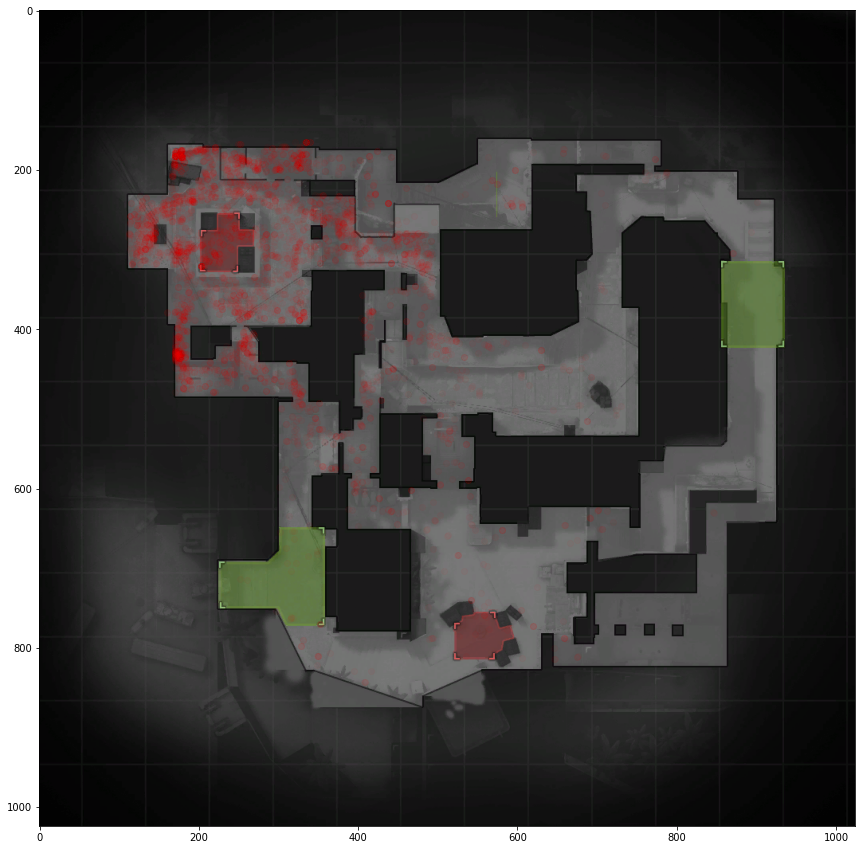

In [7]:
# BOMB SITE A
# TERRORIST POSITION WHEN THEY WON

t_data_siteB = data[(data.is_bomb_planted == True) & (data.att_side == 'Terrorist') & (data.bomb_site == 'B') & (data.winner_side == 'Terrorist')]

im = plt.imread("./CSGO_DATA/de_mirage.png")
plt.figure(figsize=(15,15))
t = plt.imshow(im)
t = plt.scatter(t_data_siteB['attacker_mapX'], t_data_siteB['attacker_mapY'],alpha=0.03,c='red')